In [2]:
import fsps
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
np.set_printoptions(threshold=np.nan)
%matplotlib inline

ImportError: You need to have the SPS_HOME environment variable

In [3]:
sp = fsps.StellarPopulation(compute_vega_mags=False, zcontinuous=1, zred = 3.0,
                                sfh=3, logzsol=0.0, dust_type=2, dust2=0.2,add_igm_absorption= True)

NameError: name 'fsps' is not defined

In [4]:
print(np.ndarray((11,), buffer=np.array(np.linspace(0,1,11)),dtype=float))

NameError: name 'np' is not defined

In [5]:
sp.set_tabular_sfh(np.ndarray((11,), buffer=np.array(np.linspace(0,1,11)),dtype=float), np.ndarray((11,), buffer=np.array(11*[5]),dtype=int))

NameError: name 'sp' is not defined

In [6]:
sdss_bands = fsps.find_filter('sdss')
sp.get_mags(tage=0.5, bands=sdss_bands)


NameError: name 'fsps' is not defined

In [7]:
print(sp.sfr)

NameError: name 'sp' is not defined

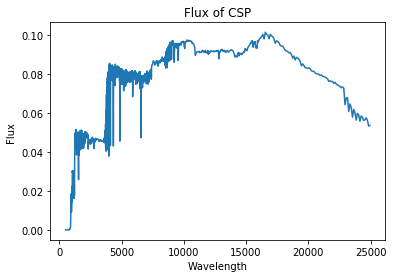

In [45]:
wave, spec = sp.get_spectrum(tage=0.5)
sed = spec*3.83*10**33/4/np.pi/(25924*10**6*3.08*10**18)**2/10**(-29)
#plt.yscale('log')
#print(wave, sed)
plt.plot(wave[np.where((wave >= 500) & (wave <= 25000))], sed[np.where((wave >= 500) & (wave <= 25000))])
plt.xlabel("Wavelength")
plt.ylabel("Flux ")
plt.title('Flux of CSP')
plt.show()

In [46]:
filtername = ['wfc_acs_f435w','wfc_acs_f606w','wfc_acs_f775w','wfc_acs_f850lp','wfc3_ir_f105w','wfc3_ir_f125w',
             'wfc3_ir_f160w','jwst_f200w','jwst_f277w','jwst_f356w','jwst_f444w']
mag = sp.get_mags(tage=0.5, bands=filtername)
print (mag)

flux = 10**((48.6+mag)/(-2.5))
print (flux)

[26.48553913 25.77829278 25.68137193 25.66988182 25.70807518 25.70423185
 25.35301391 25.10535654 25.10094118 24.95894819 24.93217186]
[9.24239124e-31 1.77289448e-30 1.93843493e-30 1.95905790e-30
 1.89134140e-30 1.89804831e-30 2.62297673e-30 3.29501490e-30
 3.30844202e-30 3.77068908e-30 3.86483767e-30]


In [47]:
filtername = ['wfc_acs_f435w','wfc_acs_f606w','wfc_acs_f775w','wfc_acs_f850lp','wfc3_ir_f105w','wfc3_ir_f125w',
             'wfc3_ir_f160w','jwst_f200w','jwst_f277w','jwst_f356w','jwst_f444w']
mag = sp.get_mags(tage=0.5, bands=filtername)
print (mag)

flux = 10**((48.6+mag)/(-2.5))/1e-29 #in micro Janskys
print (flux)

[26.48553913 25.77829278 25.68137193 25.66988182 25.70807518 25.70423185
 25.35301391 25.10535654 25.10094118 24.95894819 24.93217186]
[0.09242391 0.17728945 0.19384349 0.19590579 0.18913414 0.18980483
 0.26229767 0.32950149 0.3308442  0.37706891 0.38648377]


transmission len 10000
transmission len 10000
transmission len 10000
transmission len 10000
transmission len 9001
transmission len 9000
transmission len 9001
transmission len 907
transmission len 1425
transmission len 1346
transmission len 1452


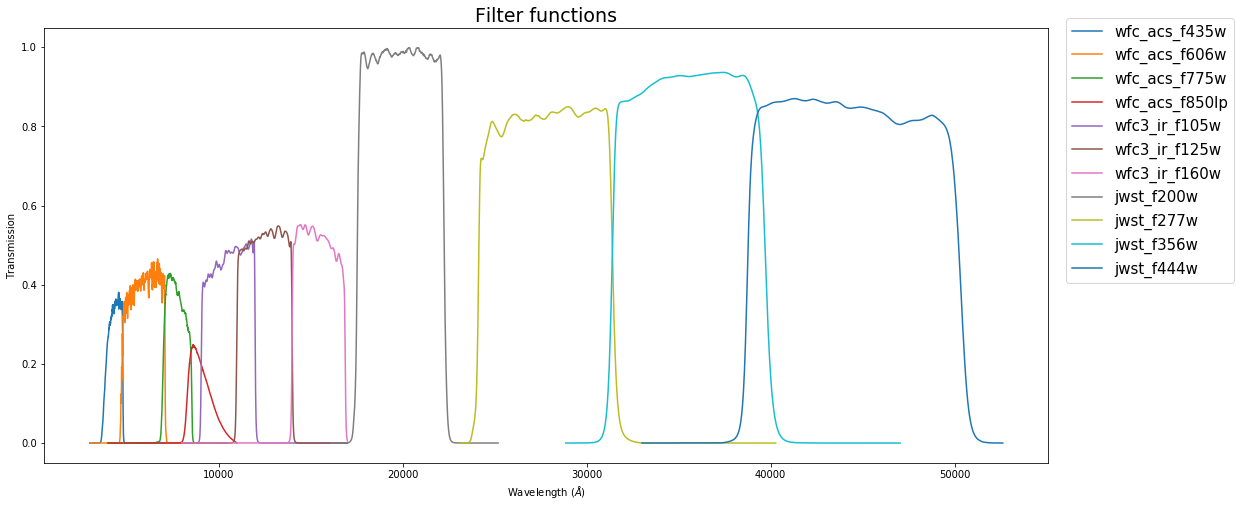

In [48]:
wavelength_list =[]
transmission_list = []
for filter_name in filtername:
    g = fsps.get_filter(filter_name)
    wavelength,transmission = g.transmission
    print 'transmission len', len(transmission)
    plt.xlabel(r"Wavelength ($\AA$)")
    wavelength_list.append(wavelength)
    transmission_list.append(transmission)
    plt.ylabel("Transmission")
    plt.plot(wavelength,transmission,label=filter_name)
    plt.gcf().set_size_inches(18, 8)
    plt.legend(bbox_to_anchor=(1.01, 1.04),loc=2,fontsize=15)
    plt.title('Filter functions',fontsize=19)
